# Método de Punto fijo.

Consideremos el problema de punto fijo $x=g(x)$, con 

> $$g(x)=\frac{1}{2+x}.$$  

Probar que existe una única solución en el intervalo $[0,1]$ y que método de aproximaciones sucesivas $x_{k+1}=g(x_k)$ converge hacia una solución para cualquier inicialización, $x_0\in[0,1]$. Aproximar la solución con un error menor que $\varepsilon=10^{-8}$.

## 1. Existencia y unicidad de solución

Veamos que $g$ está en las hipótesis del teorema de punto fijo en $[0,1]$ (lo que implica la existencia de un único punto fijo al que converge el método de aproximaciones sucesivas).

### Hiṕótesis 1: $g([0,1])\subset [0,1]$:

* Es fácil ver que $g$ es decreciente en $[0,1]$, pues es derivable en todo este intervalo y $g'(x)=\frac{-1}{(2+x)^2}$
* Por lo tanto basta ver que $g(0)\in [0,1]$ y $g(1)\in [0,1]$. Pero esto es muy fácil: $g(0)= 1/2$, $g(1)=1/3 \in [0,1]$

### Hipótesis 2: $|g'(x)|<1$ para todo $x\in [0,1]$

Ver que $|g'(x)|<1$ para todo $x\in [0,+\infty)$ es fácil: Si $x\ge 0$, tenemos $2+x \ge 2$ y así $|g'(x)|=\frac{1}{(2+x)^2} \le \frac{1}{4} < 1$.


## 2. Aproximación del punto fijo

In [1]:
# Sólo para Python 2
# from __future__ import division, print_function 

import numpy as np
import matplotlib.pyplot as plt

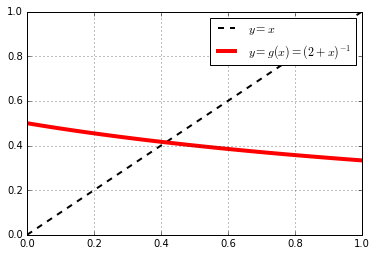

In [2]:
g = lambda x: 1.0/(2+x)

x = np.linspace(0,1)
plt.plot(x, x, "--", color="black", linewidth=2, label="$y=x$")
plt.plot(x, g(x), color="red", linewidth=4, label="$y=g(x)=(2+x)^{-1}$")
plt.legend()
plt.grid()
plt.show()

Geométricamente, el punto fijo parece estar en torno a $x=0.4$ (intersección de las curvas $y=x$ e $y=g(x)$). Vamos a aproximar la solución mediante el método de punto fijo (o de aproximaciones sucesivas):

In [3]:
def punto_fijo(g, x0, tol=1e-12, maxiter=100):
    """Cálculo de un punto fijo de la función g(x) mediante el
    método de aproximaciones sucesivas, $x_{k+1} = g(x_k)$.
    
    Argumentos:
        g: Función considerada
        x0 : Estimación inicial del punto fijo
        tol: Tolerancia (diferencia entre dos iteraciones sucesivas)
        maxiter: Número máximo de iteraciones admitidas
    Valores devueltos: (x, niter) con
        x: Aproximación del punto fijo
        niter: Número de iteraciones realizadas
    """
    
    k = 0
    error = tol
    while k<maxiter and error >= tol:    
        x1 = g(x0) # Iteración de punto fijo
        error = abs(x1-x0)
        x0 = x1 # Preparamos la siguiente iteración
        k = k+1
        
    # Si se llegó al número máximo de iteraciones, lanzar una excepción (un "error")
    if k==maxiter: 
        raise ValueError("Error de convergencia!") 
        
    # Si todo fue bien, devolvemos la solución y el número de iteraciones
    return x1, k
  
x, niter = punto_fijo(g, 0.5)
print(u"Aproximación del pto. fijo:", x)
print(u"Número de iteraciones:", niter)

Aproximación del pto. fijo: 0.414213562373142
Número de iteraciones: 16


In [4]:
# Como estimación del resultado, podemos analizar el "residuo" de la aproximación
print ("Residuo, |x-g(x)| =", abs(x-g(x)))

Residuo, |x-g(x)| = 5.5011550870176507e-14


## 3. Aproximar la solución con un error menor que $\varepsilon=10^{-8}$

Según la estimación a priori del error en el método de p. fijo,

$$
|x_{k+1}-\alpha| \le \frac{\lambda}{1-\lambda}\left| x_{k+1}-x_k\right| = \frac{1/4}{1-1/4}\left| x_{k+1}-x_k\right| = \frac 1 3 \left| x_{k+1}-x_k \right|,
$$
donde se ha tomado como constante de contractividad $\lambda=1/4$ (cota de $g'(x)$).

Luego, para que $|x_{k+1}-\alpha| < 10^{-8}$, es suficiente que $|x_{k+1}-x_k|< 3\cdot 10^{-8}$:

In [5]:
x, niter = punto_fijo(g, 0.5, tol=3e-8)

print ("x = %2.20f, niter = %i" % (x, niter))
print ("Residuo, |x-g(x)| =", abs(x-g(x)))

x = 0.41421356421356420041, niter = 10
Residuo, |x-g(x)| = 2.156243683604231e-09
